![image info](sfr3.png)

# Data Engineer Case Study

### Import python libraries and load dataset in a Pandas dataframe: Tenant, Rent History

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
import pandas as pd

# Open tenant information dataset in a pandas dataframe

tenant_info_df = pd.read_csv(
    filepath_or_buffer="generateData/tenantInformation.csv"
)

rent_info_df = pd.read_csv(
    filepath_or_buffer="generateData/rentInformation.csv"
)

applicant_info_df = pd.read_csv(
    filepath_or_buffer="generateData/applicantInformation.csv"
)

In [2]:
print(f"Number of rows in Tenant Information Data: {tenant_info_df.count()}")
print(f"Number of rows in Rent Information Data: {rent_info_df.count()}")
print(f"Number of rows in Applicant Information Data: {applicant_info_df.count()}")

Number of rows in Tenant Information Data: UUID                      100
Tenant_Name               100
Rent_Amount               100
Lease_Start_Date          100
Lease_End_Date            100
Utility_Amount            100
Pet_Amount                 42
Tenant_Screening_Score    100
House_Plan                100
Counties                  100
dtype: int64
Number of rows in Rent Information Data: Payment_ID           923
Tenant_UUID          923
Tenant_Name          923
Month_year           923
Rent_Paid_Date       923
Rent_Amount_Paid     923
Total_Rent_Amount    923
Rent_Amount_Due      923
Late_Payment         923
dtype: int64
Number of rows in Applicant Information Data: Applicant_UUID               200
Applicant_Name               200
Rent_Amount                  200
Lease_Start_Date             200
Lease_End_Date               200
Applicant_Screening_Score    200
House_Plan                   200
Counties                     200
Monthly_Income               200
dtype: int64


## Tenant Data Analysis

In [3]:
# Show subset of tenant data
tenant_info_df.head(5)

,UUID,Tenant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Utility_Amount,Pet_Amount,Tenant_Screening_Score,House_Plan,Counties
0,1,Sandra Murphy,1500,2023-08-30,2023-09-29,188.31,NaN,630,3BHK,Wheeler
1,2,Joseph Jones,1650,2023-06-07,2023-12-04,115.87,10.0,775,2BHK,Montgomery
2,3,Nicholas Roberts,900,2023-02-21,2023-08-20,196.07,10.0,803,3BHK,Atkinson
3,4,Steven Jackson,1550,2023-07-04,2024-07-03,105.66,NaN,847,2BHK,Calhoun
4,5,Gary Walker,1900,2023-09-07,2024-03-05,61.51,NaN,664,2BHK,Pulaski


In [4]:
# Show datatypes of imported values in tenant dataframe
tenant_info_df.dtypes

UUID                        int64
Tenant_Name                object
Rent_Amount                 int64
Lease_Start_Date           object
Lease_End_Date             object
Utility_Amount            float64
Pet_Amount                float64
Tenant_Screening_Score      int64
House_Plan                 object
Counties                   object
dtype: object

In [5]:
#Replace NaN values in Pet_Amount with 0.0
fill_na_values = {"Pet_Amount": 0.0}
tenant_info_df = tenant_info_df.fillna(value=fill_na_values)

# Convert Date Columns from Object to Datetime
tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]] = tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]].apply(pd.to_datetime)

print(tenant_info_df.head(5))
print(tenant_info_df.dtypes)

   UUID       Tenant_Name  Rent_Amount Lease_Start_Date Lease_End_Date  \
0     1     Sandra Murphy         1500       2023-08-30     2023-09-29   
1     2      Joseph Jones         1650       2023-06-07     2023-12-04   
2     3  Nicholas Roberts          900       2023-02-21     2023-08-20   
3     4    Steven Jackson         1550       2023-07-04     2024-07-03   
4     5       Gary Walker         1900       2023-09-07     2024-03-05   

   Utility_Amount  Pet_Amount  Tenant_Screening_Score House_Plan    Counties  
0          188.31         0.0                     630       3BHK     Wheeler  
1          115.87        10.0                     775       2BHK  Montgomery  
2          196.07        10.0                     803       3BHK    Atkinson  
3          105.66         0.0                     847       2BHK     Calhoun  
4           61.51         0.0                     664       2BHK     Pulaski  
UUID                               int64
Tenant_Name                       object

## Frequency of lease start based on month

Text(0.5, 1.0, 'Frequency of Lease Start Month in Georgia')

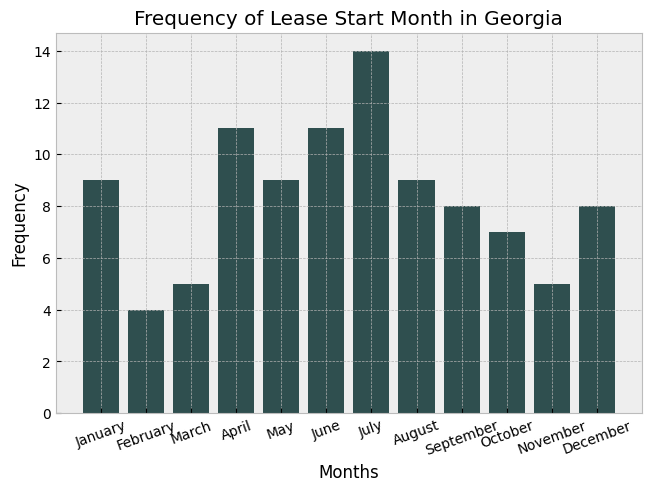

In [6]:
lease_start_month = tenant_info_df.groupby(tenant_info_df["Lease_Start_Date"].dt.month).count()["UUID"].rename("Frequency of Start Month")
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

lease_month_barchart ={
} 
for init in month_map:
    lease_month_barchart[month_map[init]] = 0

for month, frequency in lease_start_month.items():
    lease_month_barchart[month_map[month]] = frequency
plt.style.use("bmh")
plt.figure(layout='constrained')
plt.xticks(rotation=20)
plt.bar(list(lease_month_barchart.keys()), height = list(lease_month_barchart.values()), color = "darkslategray")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Frequency of Lease Start Month in Georgia")

### By analyzing the frequency of lease start and end months, we can derive analytical insights like:

- **Seasonal Trends**: We may notice a particular cluster of months where we see more lease starts than others. Similarly, we can notice when tenants are more likely to move out. Using these insights, we can adapt our marketing strategy and improve the property just before we see an influx of tenants. We can proactively work towards smoother tenant exit or promote tenant retention incentives based on an uptick of lease-end months.
- **Market Demand Insights**: We can proactively allocate budget and resources depending on this analysis. The analysis can also point towards a broader market trend which we can work to identify any correlation.

In [7]:
#Calculate Total Rent Amount for a tenant by adding Base Rent Amount, Utility, and Pet Fees

tenant_info_df["Total_Rent_Amount"] = tenant_info_df["Rent_Amount"] + tenant_info_df["Utility_Amount"] + tenant_info_df["Pet_Amount"]
tenant_info_df.head(5)

,UUID,Tenant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Utility_Amount,Pet_Amount,Tenant_Screening_Score,House_Plan,Counties,Total_Rent_Amount
0,1,Sandra Murphy,1500,2023-08-30,2023-09-29,188.31,0.0,630,3BHK,Wheeler,1688.31
1,2,Joseph Jones,1650,2023-06-07,2023-12-04,115.87,10.0,775,2BHK,Montgomery,1775.87
2,3,Nicholas Roberts,900,2023-02-21,2023-08-20,196.07,10.0,803,3BHK,Atkinson,1106.07
3,4,Steven Jackson,1550,2023-07-04,2024-07-03,105.66,0.0,847,2BHK,Calhoun,1655.66
4,5,Gary Walker,1900,2023-09-07,2024-03-05,61.51,0.0,664,2BHK,Pulaski,1961.51


In [8]:
# Calculate Average rent per house plan across Counties of Georgia
county_house_rent_avg = tenant_info_df.groupby(["Counties","House_Plan"])["Total_Rent_Amount"].mean().round(2)
# Run this to find info on all the tenants in a particular county, for e.g. "Baker": tenant_info_df[tenant_info_df["Counties"]=="Baker"]
county_house_rent_avg

Counties    House_Plan
Appling     1BHK          1610.26
            2BHK          1406.51
Atkinson    1BHK          1669.57
            2BHK          1427.81
            3BHK           994.88
Bacon       1BHK          1070.28
            2BHK          1311.38
            3BHK          1615.38
Baker       1BHK          1758.66
            2BHK          1439.68
Calhoun     1BHK          1869.05
            2BHK          1769.70
            3BHK          1410.31
Camden      1BHK          1470.37
            2BHK          1799.60
            3BHK          1656.76
Candler     2BHK           767.67
            3BHK          1979.85
Carroll     1BHK          1062.37
            2BHK          1121.39
            3BHK          2027.36
Mitchell    1BHK          2056.92
            2BHK          1087.48
            3BHK          1316.06
Monroe      3BHK          1845.86
Montgomery  1BHK          1597.43
            2BHK          1603.49
            3BHK          1360.87
Morgan      1BHK         

## Average Rent per house plan across Counties of Georgia

Text(0.5, 1.0, 'Average Rent of 3BHK in Counties of Georgia')

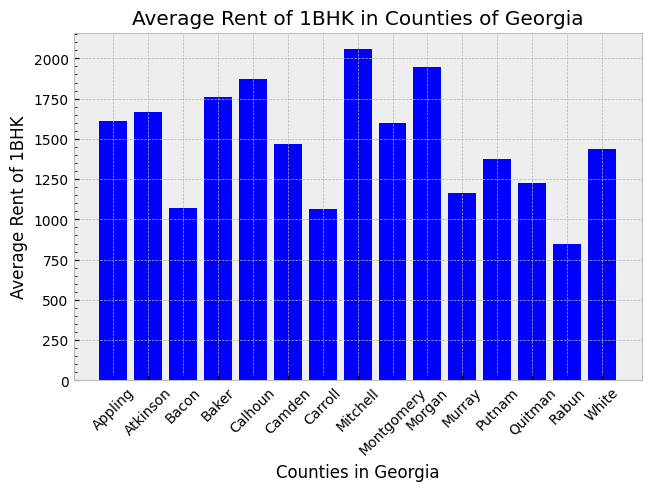

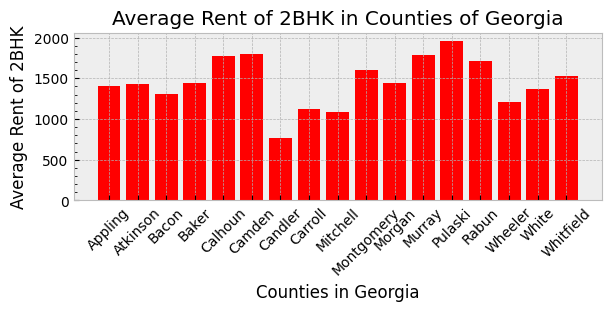

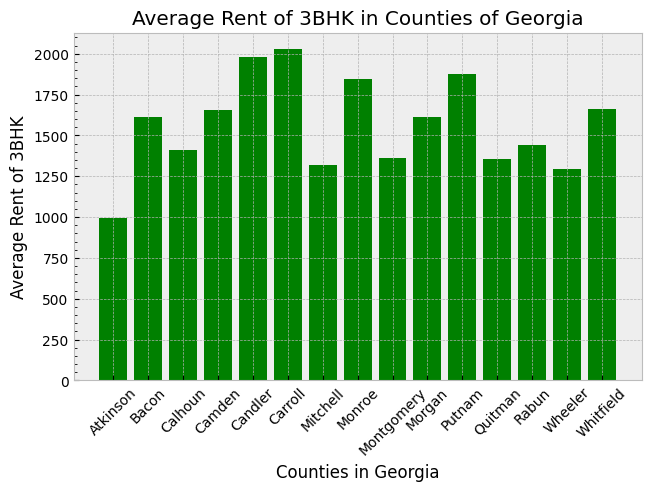

In [9]:
fig, ax = plt.subplots(layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "1BHK":
        plt.bar(index[0], height = rent_avg, color = "blue")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 1BHK")
plt.title("Average Rent of 1BHK in Counties of Georgia")

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "2BHK":
        plt.bar(index[0], height = rent_avg, color = "red")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 2BHK")
plt.title("Average Rent of 2BHK in Counties of Georgia")

fig, ax = plt.subplots(layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "3BHK":
        plt.bar(index[0], height = rent_avg, color = "green")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 3BHK")
plt.title("Average Rent of 3BHK in Counties of Georgia")

## By analyzing the average rent per house plan across different counties of Georgia, we can derive analytical insights like:

- **Regional Rent Disparities**: By comparing average rents for different house plans across counties, we can identify regions where rental prices are higher or lower. This information can help inform rental property investment decisions, allowing us to target areas with higher rental yields or potential for rental price appreciation.

- **Demand for Housing Types**: Understanding the average rent per house plan can provide insights into the demand for different types of housing in each county. For example, if 2bhk apartments command significantly higher rents compared to 1bhk or 3bhk apartments in a particular county, it may indicate a higher demand for that housing type in the area.

## Rent History Data Analysis

In [10]:
# Convert Date Columns from Object to Datetime
rent_info_df["Rent_Paid_Date"] = rent_info_df["Rent_Paid_Date"].apply(pd.to_datetime)

print(rent_info_df.head(5))
print(rent_info_df.dtypes)

                             Payment_ID  Tenant_UUID    Tenant_Name  \
0  ba6c29f1-b7e4-403a-98da-c22d77f5cc51            1  Sandra Murphy   
1  62059433-f4dd-4202-b51f-c12711b8cb15            1  Sandra Murphy   
2  e81feada-7711-4f04-84d9-ce662e69fcd4            1  Sandra Murphy   
3  10d231cf-7844-43d5-bfc3-c219b6188dd3            1  Sandra Murphy   
4  d8de2a3e-bbe9-48bc-adba-ed913bde2149            1  Sandra Murphy   

       Month_year Rent_Paid_Date  Rent_Amount_Paid  Total_Rent_Amount  \
0     August_2023     2023-08-30           1688.31            1688.31   
1  September_2023     2023-09-29           1688.31            1688.31   
2    October_2023     2023-10-29           1688.31            1688.31   
3   November_2023     2023-11-30           1688.31            1688.31   
4   December_2023     2023-12-29           1688.31            1688.31   

   Rent_Amount_Due Late_Payment  
0              0.0            Y  
1              0.0            Y  
2              0.0            Y 

In [11]:
#Calculate frequency of late payments per tenant
rent_tenant_late_freq = rent_info_df[rent_info_df["Late_Payment"]=="Y"].groupby(["Tenant_Name", "Tenant_UUID"]).count()["Late_Payment"]

for tenant_info, late_payment_count in rent_tenant_late_freq.items():
    print(f"Tenant Name - {tenant_info[0]}, Tenant UUID - {tenant_info[1]}, Late Payment Count - {late_payment_count}")

Tenant Name - Amanda Hill, Tenant UUID - 54, Late Payment Count - 3
Tenant Name - Amanda Jones, Tenant UUID - 87, Late Payment Count - 3
Tenant Name - Andrew Adams, Tenant UUID - 13, Late Payment Count - 4
Tenant Name - Andrew Bailey, Tenant UUID - 37, Late Payment Count - 7
Tenant Name - Angela Morris, Tenant UUID - 61, Late Payment Count - 8
Tenant Name - Angela Walker, Tenant UUID - 57, Late Payment Count - 6
Tenant Name - Anthony Walker, Tenant UUID - 51, Late Payment Count - 2
Tenant Name - Betty Nguyen, Tenant UUID - 44, Late Payment Count - 10
Tenant Name - Betty Perez, Tenant UUID - 59, Late Payment Count - 3
Tenant Name - Betty Phillips, Tenant UUID - 12, Late Payment Count - 3
Tenant Name - Betty White, Tenant UUID - 30, Late Payment Count - 1
Tenant Name - Brenda Smith, Tenant UUID - 43, Late Payment Count - 5
Tenant Name - Brenda Stewart, Tenant UUID - 66, Late Payment Count - 3
Tenant Name - Carol Hill, Tenant UUID - 91, Late Payment Count - 6
Tenant Name - Charles Bailey,

(2023, 1) 6
(2023, 2) 7
(2023, 3) 5
(2023, 4) 13
(2023, 5) 10
(2023, 6) 16
(2023, 7) 26
(2023, 8) 26
(2023, 9) 31
(2023, 10) 31
(2023, 11) 40
(2023, 12) 42
(2024, 1) 49
(2024, 2) 37
(2024, 3) 6


Text(0.5, 1.0, 'Frequency of Late Payments by Months')

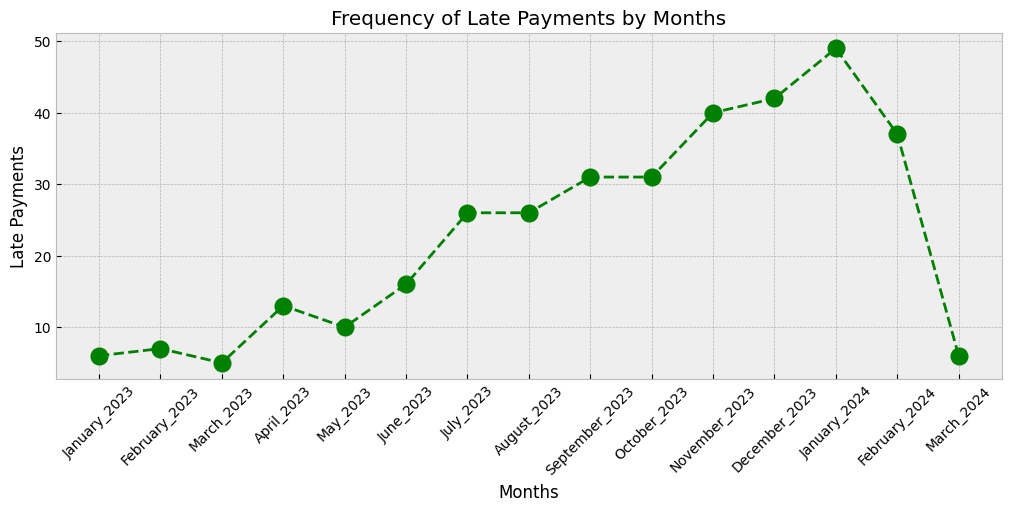

In [12]:
#Calculate frequency of late payments per month
rent_month_late_freq = rent_info_df[rent_info_df["Late_Payment"]=="Y"].groupby([rent_info_df["Rent_Paid_Date"].dt.year, rent_info_df["Rent_Paid_Date"].dt.month]).count()["Late_Payment"]

month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
x_axis = []
y_axis = []

for ind, val in rent_month_late_freq.items():
    print(ind, val)
    x_axis.append(month_map[ind[1]] + "_" + str(ind[0]))
    y_axis.append(val)


fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
plt.plot(x_axis, y_axis, 'go--', linewidth=2, markersize=12)
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Late Payments")
plt.title("Frequency of Late Payments by Months")

## By analyzing the sum of late rental payments each month, we can provider analytical insights like:

- **Financial Health Monitoring**: Tracking the total sum of late payments each month allows us to monitor the financial health of the rental business. Sudden increases in late payments may indicate cash flow problems for tenants or broader economic challenges in the market, prompting us to take proactive measures like adjusting rental policies.

- **Tenant Behavior Patterns**: Analyzing late payment patterns can help identify recurring issues or trends among tenants. For example, if certain tenants consistently make late payments, it may signal underlying financial difficulties or a need for better communication about payment expectations. Understanding these patterns can inform tenant management strategies, such as implementing more precise payment reminders or offering flexible payment options.

## Merge Rent History Data with Tenant data

In [13]:
# Merge Rent History Dataframe with Tenant Information Dataframe
tenant_rent_df = rent_info_df.merge(tenant_info_df, how = "left", left_on="Tenant_UUID", right_on="UUID")

#ASSUMPTION: If the date of rent paid is after 27th of a month, we are classifying it as late
tenant_rent_df.filter(items=["Tenant_Name_x", "Late_Payment", "Tenant_Screening_Score", "Rent_Paid_Date"])

,Tenant_Name_x,Late_Payment,Tenant_Screening_Score,Rent_Paid_Date
0,Sandra Murphy,Y,630,2023-08-30
1,Sandra Murphy,Y,630,2023-09-29
2,Sandra Murphy,Y,630,2023-10-29
3,Sandra Murphy,Y,630,2023-11-30
4,Sandra Murphy,Y,630,2023-12-29
...,...,...,...,...
918,Steven Young,Y,636,2023-10-31
919,Steven Young,Y,636,2023-11-29
920,Steven Young,Y,636,2023-12-30
921,Steven Young,Y,636,2024-01-28


In [14]:
# Calculate Frequency of Late Payments by grouping them by Tenant_Screening_Score
screening_payment_res = tenant_rent_df[tenant_rent_df["Late_Payment"]=="Y"].groupby(["Tenant_Screening_Score"]).count()["Late_Payment"]
print(screening_payment_res)

Tenant_Screening_Score
542    5
549    6
556    7
559    8
572    1
      ..
827    7
830    9
836    6
847    3
850    3
Name: Late_Payment, Length: 73, dtype: int64


Text(0.5, 1.0, 'Frequency of Late Payments by Tenant Screening Score')

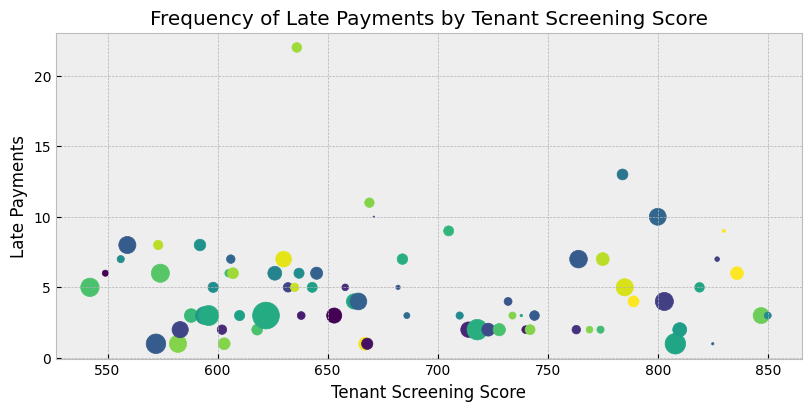

In [15]:
scatter_plot_data = {
    "tenant_screening_score":[],
    "late_payment_count":[],
}
for index, count in screening_payment_res.items():
    scatter_plot_data["tenant_screening_score"].append(index)
    scatter_plot_data["late_payment_count"].append(count)
scatter_plot_data["color"] = np.random.randint(0, 50, len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.random.randn(len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.abs(scatter_plot_data["size"]) * 100

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
plt.style.use("bmh")
ax.scatter("tenant_screening_score", "late_payment_count", c="color", s="size", data=scatter_plot_data)
ax.set_xlabel("Tenant Screening Score")
ax.set_ylabel("Late Payments")
plt.title("Frequency of Late Payments by Tenant Screening Score")

## By analyzing late payments by tenant screening score, we can provide analytical insights like:

- **Tenant Selection**: By correlating late rental payments with tenant screening scores, we can assess the effectiveness of the screening process in identifying high-risk tenants. For example, if tenants with lower screening scores consistently have higher rates of late payments, it may indicate areas for improvement in the screening criteria or the need for more rigorous tenant vetting processes.

- **Risk Mitigation Strategies**: Understanding the relationship between tenant screening scores and late payments can help us develop better risk mitigation strategies. We may implement stricter lease terms, require higher security deposits, or offer payment plans to mitigate potential financial risks associated with tenants whose screening score falls in the category that frequently default on the payments.

- **Portfolio Management**: Analyzing late payments by tenant screening score allows us to evaluate the overall risk profile of the rental portfolio. By identifying trends or patterns among tenants with different screening scores, we can strategically allocate resources, such as property maintenance or tenant support services, to minimize risks and optimize portfolio performance.

Text(0.5, 1.0, 'Late Payments by Counties of Georgia')

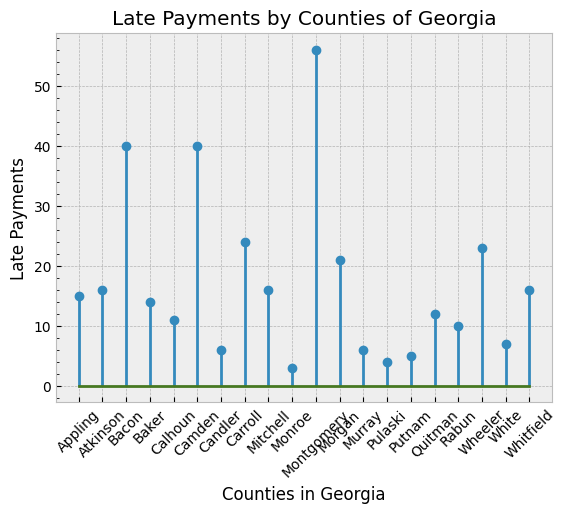

In [16]:
# Calculate Frequency of Late Payments by Counties in Georgia
late_Payment_by_county = tenant_rent_df[tenant_rent_df["Late_Payment"]=="Y"].groupby(["Counties"])["Late_Payment"].count()
county = []
late_payment_freq = []
for index, freq in late_Payment_by_county.items():
    county.append(index)
    late_payment_freq.append(freq)

fig, ax = plt.subplots()
plt.style.use("bmh")
plt.stem(county, late_payment_freq)
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.xlabel("Counties in Georgia")
plt.ylabel("Late Payments")
plt.title("Late Payments by Counties of Georgia")

## By analyzing late rental payments by counties in Georgia, we can derive various analytical insights like:

- **Regional Payment Behavior**: By visualizing late rental payments by counties, we can identify regions with higher rates of late payments than others. This information allows us to understand the payment behavior trends in different areas, enabling us to tailor our collection strategies and allocate resources accordingly.

- **Risk Assessment and Portfolio Management**: Identifying counties with higher rates of late payments can help us assess the risk associated with properties in those areas. This information is valuable for portfolio management, allowing us to prioritize risk mitigation efforts, such as implementing stricter lease terms or increasing security deposits, for properties in high-risk counties.

- **Market Conditions**: Late payment trends across counties can also provide insights into local economic conditions and rental market dynamics. For example, counties experiencing economic downturns or job losses may have higher rates of late payments due to financial difficulties faced by tenants. Understanding these market conditions can inform our decision-making when acquiring or managing rental properties.

## Applicant Data Analysis

In [17]:
#Show a subset of Applicant Data
applicant_info_df.head(5)

,Applicant_UUID,Applicant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Applicant_Screening_Score,House_Plan,Counties,Monthly_Income
0,Applicant_1,Jason White,1900,2023-11-20,2024-11-19,756,1BHK,Appling,4500
1,Applicant_2,Sarah Johnson,750,2023-03-14,2024-03-13,800,1BHK,Morgan,10500
2,Applicant_3,Thomas Rivera,900,2023-04-01,2024-03-31,775,1BHK,Whitfield,5850
3,Applicant_4,Ryan Harris,1950,2023-03-24,2024-03-23,661,2BHK,Appling,10400
4,Applicant_5,Gary Peterson,1100,2023-01-28,2023-02-27,619,1BHK,Carroll,7800


In [18]:
# Convert Date Columns from Object to Datetime
applicant_info_df[["Lease_Start_Date", "Lease_End_Date"]] = applicant_info_df[["Lease_Start_Date", "Lease_End_Date"]].apply(pd.to_datetime)

# Calculate lease duration
applicant_info_df["Lease_Duration"] = applicant_info_df["Lease_End_Date"] - applicant_info_df["Lease_Start_Date"]


In [19]:
# Reject Application if Applicant Screening Score based on conditions:
# Screening Score > 559: Accept
# Screening Score < 524: Reject
# Screening Score >= 524 and Screening Score <= 537
#
# https://www.turbotenant.com/blog/what-is-a-tenant-screening-report/

def application_decision(aid):
    if aid["Applicant_Screening_Score"]<524:
        return "N"
    elif aid["Applicant_Screening_Score"]>559 and aid["Applicant_Screening_Score"]<=850:
        return "Y"
    elif aid["Applicant_Screening_Score"]>=524 and aid["Applicant_Screening_Score"]<=537 and aid["Rent_Amount"] <= aid["Monthly_Income"]/2:
        return "Y"
    elif aid["Applicant_Screening_Score"]>537 and aid["Applicant_Screening_Score"]<=559 and aid["Rent_Amount"] <= aid["Monthly_Income"]/1.5:
        return "Y"
    else:
        return "N"
        
applicant_info_df["Application_Decision"] = applicant_info_df.apply(application_decision, axis=1)

#Added Application Decision
applicant_info_df.head(10)

,Applicant_UUID,Applicant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Applicant_Screening_Score,House_Plan,Counties,Monthly_Income,Lease_Duration,Application_Decision
0,Applicant_1,Jason White,1900,2023-11-20,2024-11-19,756,1BHK,Appling,4500,365 days,Y
1,Applicant_2,Sarah Johnson,750,2023-03-14,2024-03-13,800,1BHK,Morgan,10500,365 days,Y
2,Applicant_3,Thomas Rivera,900,2023-04-01,2024-03-31,775,1BHK,Whitfield,5850,365 days,Y
3,Applicant_4,Ryan Harris,1950,2023-03-24,2024-03-23,661,2BHK,Appling,10400,365 days,Y
4,Applicant_5,Gary Peterson,1100,2023-01-28,2023-02-27,619,1BHK,Carroll,7800,30 days,Y
5,Applicant_6,David Lee,850,2023-08-05,2023-09-04,702,1BHK,Morgan,9200,30 days,Y
6,Applicant_7,David Nelson,1000,2023-01-28,2024-01-28,686,3BHK,Atkinson,9000,365 days,Y
7,Applicant_8,Joseph Cooper,1900,2023-10-13,2024-04-10,407,2BHK,Pulaski,8400,180 days,N
8,Applicant_9,Edward Walker,1550,2023-07-09,2023-08-08,719,1BHK,Putnam,3000,30 days,Y
9,Applicant_10,Steven Murphy,1450,2023-02-22,2024-02-22,731,1BHK,Atkinson,4750,365 days,Y


In [20]:
# Calculate Average Base Rent being paid by Tenants per House Plan per lease start month across all counties
avg_lock_in_rent = tenant_info_df.groupby([tenant_info_df["Lease_Start_Date"].dt.month, "House_Plan"])["Rent_Amount"].mean().round(2)

#Calculate number of applications and group it by their lease start month
app_per_month = applicant_info_df.groupby([applicant_info_df["Lease_Start_Date"].dt.month, "House_Plan"])["Applicant_UUID"].count()

#Prepare Data to plot
month_x_axis = [month for month in month_map.values()]
avg_rent_1bhk = [0] * 12
avg_rent_2bhk = [0] * 12
avg_rent_3bhk = [0] * 12

for ind, value in avg_lock_in_rent.items():
    if ind[1] == "1BHK":
        avg_rent_1bhk[ind[0]-1] = value
    elif ind[1] == "2BHK":
        avg_rent_2bhk[ind[0]-1] = value
    elif ind[1] == "3BHK":
        avg_rent_3bhk[ind[0]-1] = value

apps_1bhk = [0] * 12
apps_2bhk = [0] * 12
apps_3bhk = [0] * 12

for ind, value in app_per_month.items():
    if ind[1] == "1BHK":
        apps_1bhk[ind[0]-1] = value
    elif ind[1] == "2BHK":
        apps_2bhk[ind[0]-1] = value
    elif ind[1] == "3BHK":
        apps_3bhk[ind[0]-1] = value

## Exploratory analysis comparing average rent paid by existing tenants for a house plan to the number of new applications

Text(0.5, 1.0, 'Current Average Rent of 1BHK Offerings vs. Number of Applicants of 1BHK')

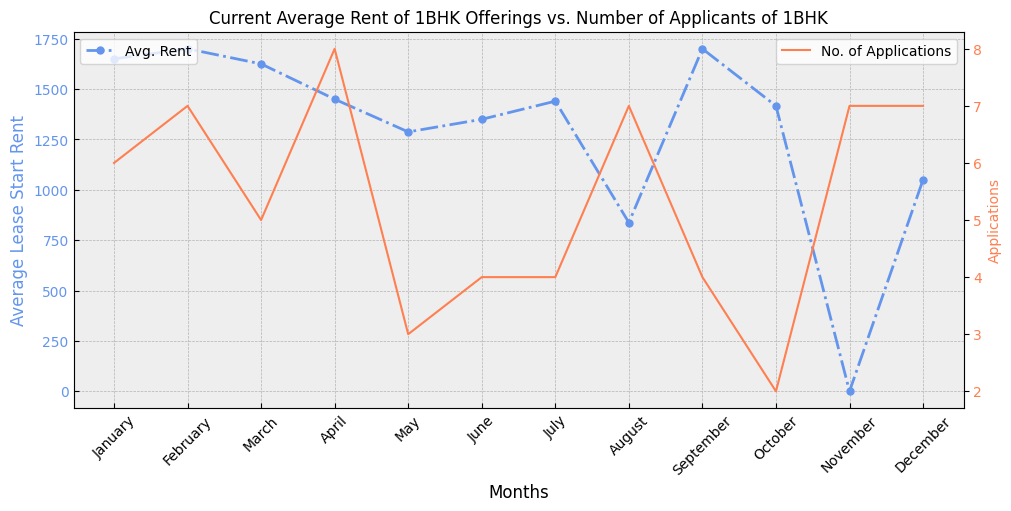

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_1bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_1bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 1BHK Offerings vs. Number of Applicants of 1BHK")

Text(0.5, 1.0, 'Current Average Rent of 2BHK Offerings vs. Number of Applicants of 2BHK')

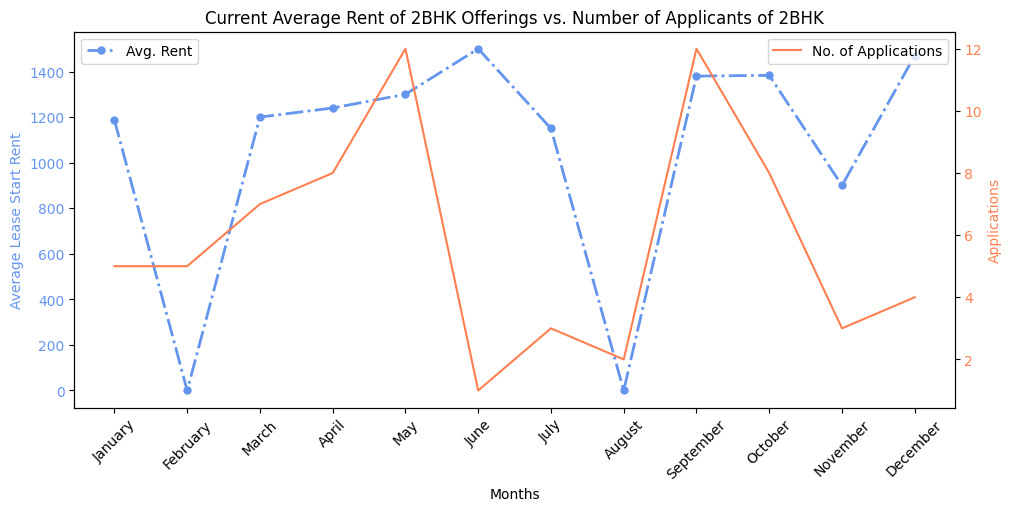

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_2bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_2bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 2BHK Offerings vs. Number of Applicants of 2BHK")

Text(0.5, 1.0, 'Current Average Rent of 3BHK Offerings vs. Number of Applicants of 1BHK')

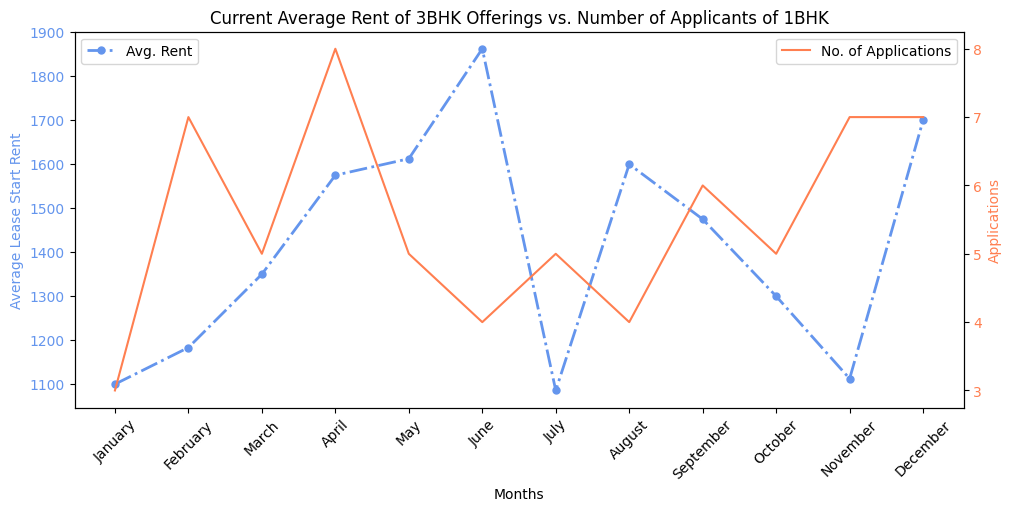

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_3bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_3bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 3BHK Offerings vs. Number of Applicants of 1BHK")

## Analyzing the relationship between the average rent per month per house plan and the number of applicants applying for similar house plans, we can derive several analytical insights like:

- **Demand-Supply Balance**: By comparing the average rent paid by tenants with the number of applicants, we can assess the balance between demand and supply in the rental market for different house plans. For example, if there are many applicants for a particular house plan, but the average rent is relatively low, it may indicate an opportunity to increase rent due to high demand.

- **Market Positioning**: We can also compare our average property rates in a particular geographical location with the competition's rates, and price our rates accordingly by combining it with our analysis.

- **Revenue Optimization**: Increasing rent in response to high demand can lead to revenue optimization by capturing the maximum value from our rental properties. By adjusting rents based on applicant numbers, we can capitalize on market trends and fluctuations, maximizing rental income and overall profitability.